# Code to find the correlations and heat maps and do PCA

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
data=np.array(df)
df.head(2)

,Oxides,Lattice_type,Bulk_Modulus,Density,Heat_capacity,Debye_Temperature,Gruneisen_parameters,Egap,Poisson_ratio,Thermal_expansion,Unitcell_atoms,Speed_of_sound,Thermal_Conductivity
0,Ag4O2,2,50.0423,6.62411,19.5660,56.0669,2.48656,0.0868,0.487902,0.000115,6,498.802,0.017453
1,Cu4O2,2,97.0286,6.01944,18.7031,155.9570,2.25972,0.6558,0.466027,0.000075,6,1237.210,0.253177


In [3]:
compounds = df.iloc[:,0]

In [4]:
tc = df.iloc[:,12]
tc2 = pd.DataFrame(tc)
tcn=(tc2 - tc2.mean()) / tc2.std()

In [5]:
df2=df.drop("Thermal_Conductivity", axis=1)

In [6]:
df_num2=df2.set_index(["Oxides"])
df_num = df.set_index(["Oxides"])

In [7]:
df_normalized2=(df_num2 - df_num2.mean()) / df_num2.std()
df_normalized=(df_num - df_num.mean()) / df_num.std()

In [8]:
df_normalized

,Lattice_type,Bulk_Modulus,Density,Heat_capacity,Debye_Temperature,Gruneisen_parameters,Egap,Poisson_ratio,Thermal_expansion,Unitcell_atoms,Speed_of_sound,Thermal_Conductivity
Oxides,,,,,,,,,,,,
Ag4O2,-0.779194,-1.749472,0.332265,-0.709054,-2.596124,2.101890,-1.084806,3.950302,2.611994,-0.875384,-2.749698,-1.078374
Cu4O2,-0.779194,-0.856547,0.048302,-0.751594,-1.991817,0.807084,-0.750033,3.505702,1.069661,-0.875384,-2.083111,-1.041901
O4Pt2,-0.779194,-0.149783,1.198893,-0.764658,-2.112509,1.105556,-1.135875,3.599886,0.067396,-0.875384,-2.216635,-1.040504
O2Pd4,-0.779194,-0.473059,1.035043,-0.758441,-2.058558,1.892919,-1.135875,3.437330,0.379640,-0.875384,-2.128085,-1.036645
Cl16Hg12O4,-0.779194,-1.948500,-0.064533,3.310760,-1.840145,1.450891,-0.267113,0.870580,1.883038,2.520285,-2.302472,-1.035499
...,...,...,...,...,...,...,...,...,...,...,...,...
Ca1O3Si1,-0.779194,1.171560,-0.848231,-1.178500,2.543814,-0.240850,0.902474,-1.568471,-0.692013,-1.005987,2.783634,3.462065
O10Ta4,0.886452,5.664260,0.852414,-0.883757,1.468525,-0.538123,-0.880647,-0.023519,-1.412873,0.169437,0.352559,4.989097
Mg1O1,-0.362783,-0.001420,-1.144137,-1.464709,2.201563,-0.934716,1.493592,-2.027156,-0.256413,-1.397795,2.541430,5.826001


In [9]:
V = np.cov(df_normalized2.T)
values, vectors = np.linalg.eig(V)

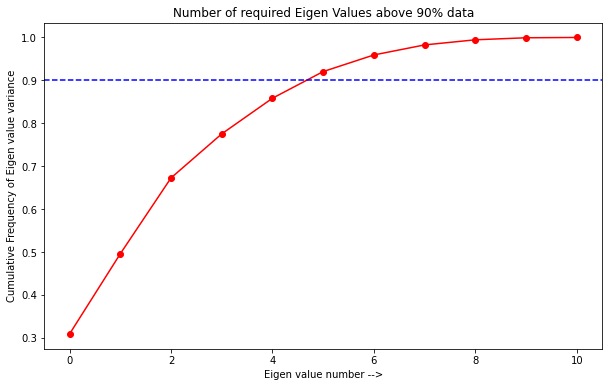

In [10]:
pca = PCA(11)
pca.fit(df_normalized2)
ratio=pca.explained_variance_ratio_
cum_sum = np.cumsum(ratio)
plt.figure(figsize=(10,6))
plt.plot(cum_sum, "r-o")
plt.axhline(y = 0.9, color = 'b', linestyle = '--')
plt.xlabel('Eigen value number -->')
plt.ylabel('Cumulative Frequency of Eigen value variance')
plt.title("Number of required Eigen Values above 90% data")
plt.savefig("eig.jpg", bbox_inches='tight', dpi=150)
plt.show()

In [11]:
pca = PCA(11)
pca.fit(df_normalized2)
new_data=pca.transform(df_normalized2)

In [12]:
val=df_normalized.corr()

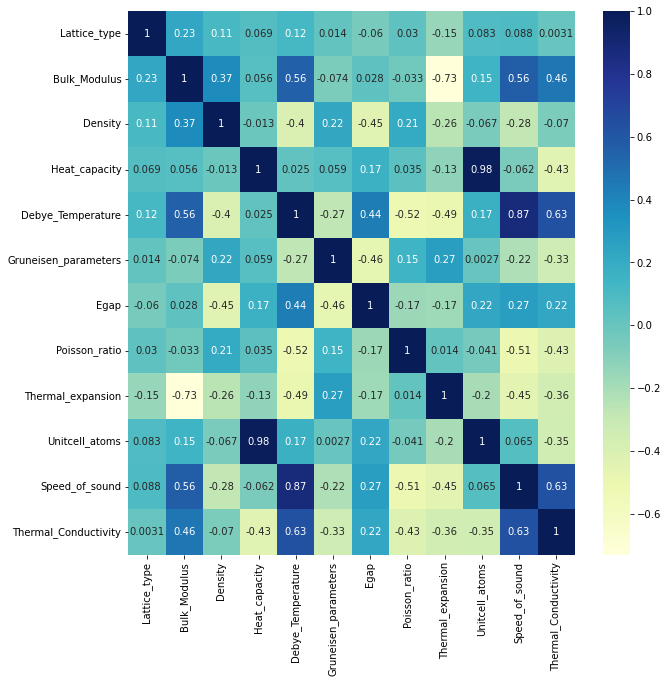

In [13]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(val, cmap="YlGnBu", annot=True)
plt.savefig("heat_map1.jpg", bbox_inches='tight', dpi=150)
plt.show()

In [14]:
pca = PCA(6)
pca.fit(df_normalized)
new_data2=pca.transform(df_normalized)
new_data3=pd.DataFrame(new_data2)
new_data3.head()

,0,1,2,3,4,5
0,-6.243209,-1.103059,0.220343,-0.754126,0.038405,2.223001
1,-4.315254,-0.838031,0.493225,-1.662510,-0.074950,1.951542
2,-4.204583,-0.612642,2.095158,-1.830059,-0.541733,1.742929
3,-4.461348,-0.685924,1.856385,-1.110798,-0.530737,2.038312
4,-4.160825,3.549136,-1.589162,0.737971,-0.814170,-0.311497


In [15]:
new_data3.columns =['PC1', 'PC2','PC3','PC4','PC5','PC6']
new_data3.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-6.243209,-1.103059,0.220343,-0.754126,0.038405,2.223001
1,-4.315254,-0.838031,0.493225,-1.662510,-0.074950,1.951542
2,-4.204583,-0.612642,2.095158,-1.830059,-0.541733,1.742929
3,-4.461348,-0.685924,1.856385,-1.110798,-0.530737,2.038312
4,-4.160825,3.549136,-1.589162,0.737971,-0.814170,-0.311497


In [16]:
check1=pd.concat([new_data3,tc2],axis=1)
check1.head()


,PC1,PC2,PC3,PC4,PC5,PC6,Thermal_Conductivity
0,-6.243209,-1.103059,0.220343,-0.754126,0.038405,2.223001,0.017453
1,-4.315254,-0.838031,0.493225,-1.662510,-0.074950,1.951542,0.253177
2,-4.204583,-0.612642,2.095158,-1.830059,-0.541733,1.742929,0.262206
3,-4.461348,-0.685924,1.856385,-1.110798,-0.530737,2.038312,0.287144
4,-4.160825,3.549136,-1.589162,0.737971,-0.814170,-0.311497,0.294549


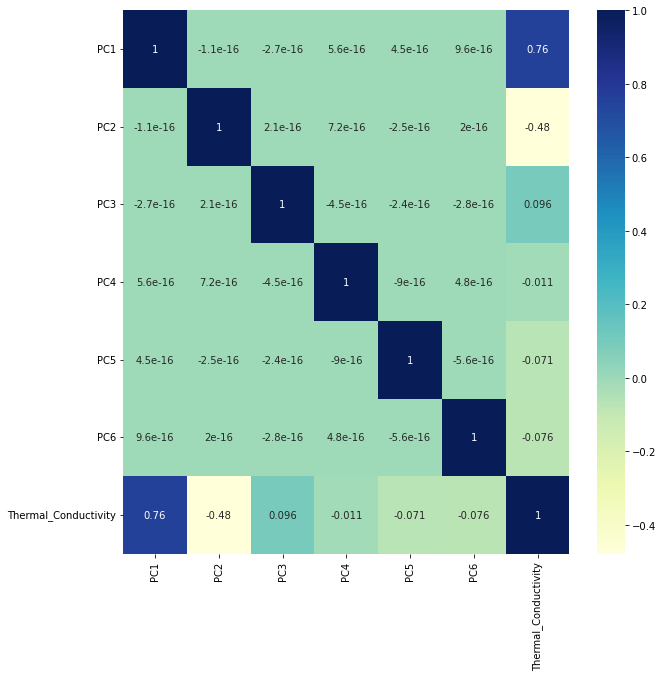

In [17]:
val_2=check1.corr()
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(val_2, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.savefig("heat_map2.jpg", bbox_inches='tight', dpi=150)
plt.show()

In [18]:
df_pc = pd.read_csv('Dataset.csv')

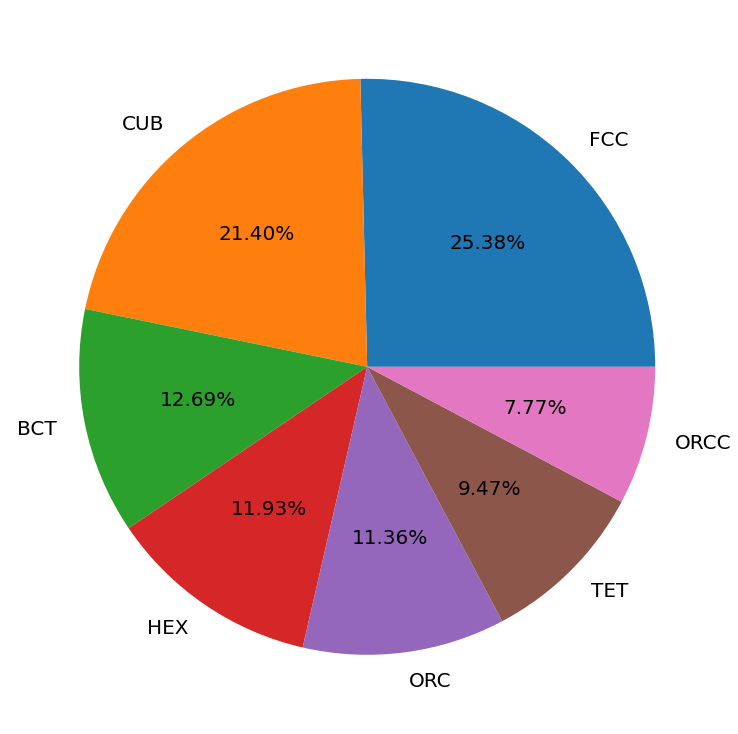

In [19]:
lat = df_pc['Lattice_type'].value_counts().rename_axis('lattices').reset_index(name='counts')

my_labels=lat.lattices
my_vals=lat.counts

fig=plt.figure(figsize=(10,10))
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(my_vals, labels=my_labels, autopct='%1.2f%%', textprops={'fontsize':20})
plt.savefig('piplot.jpg',bbox_inches='tight', dpi=150)
plt.show()